#Weather Analysis:
The analysis is based on current weather obtained on june 20 and june 21. 
The plot of latitude vs weather indicates that the temperature is highest near the tropic of cancer with latitude around 
23.5 deg N. T The maximum temperatures in the northern hemisphere falls considerably moving north of the 23.5 deg latitude 
and moving south from the equator at 0 deg. There is also a wide variation in the maximum temperatures around the world 
based on the latitude. The southern hemishphere experiences lower temperatures when it is  summer in  the northern hemisphere.


There does not seem to any correlation of latitude to cloudiness, windspeed or humidity. More historical analysis of weather data may be  needed to infer any correlations between latitude and cloudiness, windspeed or humidity. There does seem to be a concentration of data around 45-50 % humidity. This value is considered very conducive for humans. 

In [1]:
#import required python libs.
import requests
import json
from pprint import pprint
from citipy import citipy
import random
import pandas as pd
import openweathermapy.core as owm
#import seaborn as sns
#config
from config import api_key
print(api_key)

105bc2c8a00675ea3a807f619fd5e9cc


In [2]:
#urlw for openweather
#url = "http://api.openweathermap.org/data/2.5/weather?"
cnt=0
latlist=list()
longlist=list()

for k in range(-180,181,20):
    longlist.append(k)
#longlist=[-180,-160,-140,-120,-100,-8-75,-50,0,50,75,100,150,175]

#list of cities
cityset=set()

#list of countries corresponding to the city.
cnylist=list()
#create list of longitudes for use as a random choice

for i in range(-90,90,+2):
#use latitude choice from -90 to +90 and get a city closest to that latitude.
    for j in longlist:
        lat=i
        long=j
        city = citipy.nearest_city(lat, long)
        cityset.add(city.city_name)
        cnylist.append(city.country_code)
print(str(len(cityset)))
print(str(len(cnylist)))


555
1710


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
print(query_url)
#print(api_key)

http://api.openweathermap.org/data/2.5/weather?appid=105bc2c8a00675ea3a807f619fd5e9cc&units=metric&q=


In [4]:
# Get current weather for all the cities using openweathermapy. 
#initialize count variables. 
cntcity=0
cntfail=0
     
# set up lists to hold reponse info
citylist=list()
cloudiness=list()
temp = list()
cnycode=list()
date=list()
humidity=list()
lat = list()
long=list()
tempmax=list()
windspeed=list()

# Loop through the list of cities and perform a request for weather data on each city.store results in lists. 
for city in cityset:
    #print(str(city))
    cntcity=cntcity+1
    print("Retrieving  data for record " + str(cntcity) + " " + city)
    try:
        weatherdetails = requests.get(query_url + city).json()
        #pprint(weatherdetails)
        citylist.append (weatherdetails["name"])
        cloudiness.append (weatherdetails["clouds"]["all"])
        cnycode.append (weatherdetails["sys"]["country"])
        #datetime=weatherdetails["dt"]
        date.append (weatherdetails["dt"])
        humidity.append (weatherdetails["main"]["humidity"])
        lat.append (weatherdetails["coord"]["lat"])
        long.append (weatherdetails["coord"]["lon"])
        tempmax.append (weatherdetails["main"]["temp_max"])
        windspeed.append (weatherdetails["wind"]["speed"])
    except:
        cntfail +=1
        print("Error in getting data for city " + city)
        print("error code: " + weatherdetails["cod"])
        print("message: " + weatherdetails["message"])

pprint(weatherdetails)        
print("Data Retrieval Complete....")
print("---------------------------------------------------------")
print("Number of cities weather data  not found: " + str(cntfail))

Retrieving  data for record 1 florence
Retrieving  data for record 2 krasnoyarskiy
Retrieving  data for record 3 yoichi
Retrieving  data for record 4 koumac
Retrieving  data for record 5 portland
Retrieving  data for record 6 geraldton
Retrieving  data for record 7 kui buri
Retrieving  data for record 8 kanjiza
Retrieving  data for record 9 veinticinco de mayo
Retrieving  data for record 10 qinhuangdao
Retrieving  data for record 11 mabaruma
Retrieving  data for record 12 ubinskoye
Retrieving  data for record 13 laguna
Retrieving  data for record 14 kirkland lake
Retrieving  data for record 15 nhulunbuy
Retrieving  data for record 16 tonneins
Retrieving  data for record 17 shingu
Retrieving  data for record 18 khani
Retrieving  data for record 19 north platte
Retrieving  data for record 20 woodward
Retrieving  data for record 21 scarborough
Retrieving  data for record 22 trabzon
Retrieving  data for record 23 puerto escondido
Retrieving  data for record 24 orangeville
Retrieving  data 

Retrieving  data for record 167 dauphin
Retrieving  data for record 168 bartica
Retrieving  data for record 169 taixing
Retrieving  data for record 170 qaanaaq
Retrieving  data for record 171 maarianhamina
Error in getting data for city maarianhamina
error code: 404
message: city not found
Retrieving  data for record 172 kpandae
Retrieving  data for record 173 serra
Retrieving  data for record 174 borba
Retrieving  data for record 175 east wenatchee bench
Retrieving  data for record 176 inongo
Retrieving  data for record 177 hilo
Retrieving  data for record 178 lerwick
Retrieving  data for record 179 isangel
Retrieving  data for record 180 jitauna
Retrieving  data for record 181 hualmay
Retrieving  data for record 182 fuyang
Retrieving  data for record 183 cabo san lucas
Retrieving  data for record 184 rongcheng
Retrieving  data for record 185 danilov
Retrieving  data for record 186 galle
Retrieving  data for record 187 tolaga bay
Retrieving  data for record 188 namatanai
Retrieving  d

Retrieving  data for record 336 jaguarari
Retrieving  data for record 337 saurimo
Retrieving  data for record 338 carnarvon
Retrieving  data for record 339 jiuquan
Retrieving  data for record 340 taolanaro
Error in getting data for city taolanaro
error code: 404
message: city not found
Retrieving  data for record 341 faya
Retrieving  data for record 342 marcona
Error in getting data for city marcona
error code: 404
message: city not found
Retrieving  data for record 343 san andres
Retrieving  data for record 344 abu kamal
Retrieving  data for record 345 cochrane
Retrieving  data for record 346 gisborne
Retrieving  data for record 347 leningradskiy
Retrieving  data for record 348 port alfred
Retrieving  data for record 349 sokoni
Retrieving  data for record 350 pisco
Retrieving  data for record 351 ruatoria
Error in getting data for city ruatoria
error code: 404
message: city not found
Retrieving  data for record 352 guerrero negro
Retrieving  data for record 353 egvekinot
Retrieving  d

Retrieving  data for record 510 tawkar
Error in getting data for city tawkar
error code: 404
message: city not found
Retrieving  data for record 511 pozo colorado
Retrieving  data for record 512 luena
Retrieving  data for record 513 ron phibun
Retrieving  data for record 514 ayan
Retrieving  data for record 515 pandan niog
Retrieving  data for record 516 kodiak
Retrieving  data for record 517 osmena
Retrieving  data for record 518 severodvinsk
Retrieving  data for record 519 asau
Error in getting data for city asau
error code: 404
message: city not found
Retrieving  data for record 520 weligama
Retrieving  data for record 521 high point
Retrieving  data for record 522 polunochnoye
Retrieving  data for record 523 lindi
Retrieving  data for record 524 mombasa
Retrieving  data for record 525 addanki
Retrieving  data for record 526 lowicz
Retrieving  data for record 527 vaitupu
Error in getting data for city vaitupu
error code: 404
message: city not found
Retrieving  data for record 528 mi

In [5]:
print(len(citylist))
print(len(cloudiness))
print(len(tempmax))
print(len(humidity))
print(len(lat))

503
503
503
503
503


In [6]:
#store results into a dictionary and convert to a dataframe. 
weatherdict=dict()
weatherdict={"City":citylist,"Cloudiness":cloudiness,"Country_code":cnycode,"Date":date,
             "Humidity":humidity,"Latitude":lat,"Longitude":long,"Max_temp":tempmax,
             "Wind_speed":windspeed}
#print(len(weatherdict))
weather_df = pd.DataFrame(weatherdict)
weather_df.tail(10)


,City,Cloudiness,Country_code,Date,Humidity,Latitude,Longitude,Max_temp,Wind_speed
493,Punta Arenas,40,CL,1529589600,100,-53.16,-70.91,1.00,9.30
494,Black River,20,JM,1529589600,70,18.03,-77.85,29.00,2.10
495,Khanu Woralaksaburi,80,TH,1529591851,87,16.06,99.86,26.07,0.76
496,Rocha,0,UY,1529591851,76,-34.48,-54.34,14.57,7.81
497,Alyangula,0,AU,1529591851,100,-13.85,136.42,22.62,5.96
498,Montanha,88,BR,1529591851,65,-18.13,-40.37,24.12,2.21
499,Burriana,20,ES,1529589600,29,39.89,-0.08,31.00,4.10
500,Nerchinskiy Zavod,0,RU,1529591852,69,51.31,119.61,14.47,1.96
501,Padang,48,ID,1529591852,100,-0.92,100.36,28.57,1.31
502,Yellowknife,75,CA,1529589600,59,62.45,-114.38,19.00,5.10


In [7]:
#Save weather data in a csv file for future reference and use. 
weather_df.to_csv("weatherdata.csv",index=False,header=True)
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 9 columns):
City            503 non-null object
Cloudiness      503 non-null int64
Country_code    503 non-null object
Date            503 non-null int64
Humidity        503 non-null int64
Latitude        503 non-null float64
Longitude       503 non-null float64
Max_temp        503 non-null float64
Wind_speed      503 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 35.4+ KB


In [8]:
#Import dependencies for plotting.
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
x_axis=weather_df["Latitude"]
y_axis_maxtemp=weather_df["Max_temp"]
y_axis_humidity=weather_df["Humidity"]
y_axis_cloudiness = weather_df["Cloudiness"]
y_axis_Windspeed = weather_df["Wind_speed"]

In [9]:
#Review cities that have temperature greater than 28 deg C.
weather_df.loc[weather_df["Max_temp"] >= 38]
#weather_df_sortedbytemp = weather_df.sort("Max_temp",axis=1,ascending=False,inplace=False)
#weather_df_sortedbytemp.head(10)


,City,Cloudiness,Country_code,Date,Humidity,Latitude,Longitude,Max_temp,Wind_speed
107,Jalu,0,LY,1529591788,23,29.03,21.55,38.37,3.41
137,Gao,8,ML,1529591793,19,16.28,-0.04,41.77,4.51
141,Dori,32,BF,1529591794,36,14.03,-0.03,38.72,3.01
173,Tessalit,0,ML,1529591799,9,20.20,1.01,42.12,6.66
185,Mecca,0,SA,1529589600,32,21.43,39.83,42.00,3.10
194,Kidal,0,ML,1529591804,11,18.44,1.41,42.62,4.81
200,Awjilah,0,LY,1529591805,23,29.14,21.30,38.07,3.11
236,Adrar,0,DZ,1529589600,13,27.87,-0.29,42.00,10.80
318,Iranshahr,20,IR,1529589600,8,27.21,60.69,45.00,5.10
451,Zabol,0,IR,1529589600,9,31.03,61.49,41.00,8.20


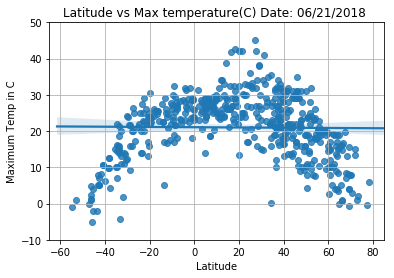

In [10]:
#Plot Latitude vs maximum temp(C)
sns.regplot(x_axis, y_axis_maxtemp, data=None, x_estimator=None, x_bins=None, x_ci='ci', 
            scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, 
            logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, 
            truncate=False, dropna=True, x_jitter=None, y_jitter=None, label="Latitude vs Max temperature(C)", 
            color=None,marker='o', scatter_kws=None, line_kws=None, ax=None)
plt.title("Latitude vs Max temperature(C) Date: 06/21/2018 ")
plt.grid()
plt.xlim(-65,85)
plt.ylim(-10,50)
plt.ylabel("Maximum Temp in C")
plt.savefig("Images/latvsMaxtemp.png")

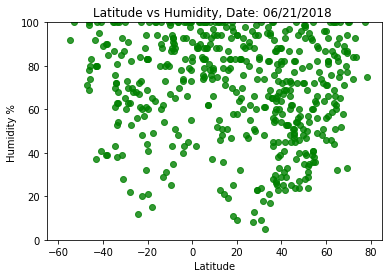

In [11]:
#Plot of latitude vs Humidity
sns.regplot(x_axis, y_axis_humidity, data=None, x_estimator=None, x_bins=None, x_ci='ci', 
            scatter=True, fit_reg=False, ci=95, n_boot=1000, units=None, order=1, 
            logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, 
            truncate=False, dropna=True, x_jitter=None, y_jitter=None, label=None, color="g", 
            marker='o', scatter_kws=None, line_kws=None, ax=None)
plt.title("Latitude vs Humidity, Date: 06/21/2018 ")
plt.xlim(-65,85)
plt.ylim(-0,100)
plt.ylabel("Humidity % ")
plt.savefig("Images/latvshumidity.png")

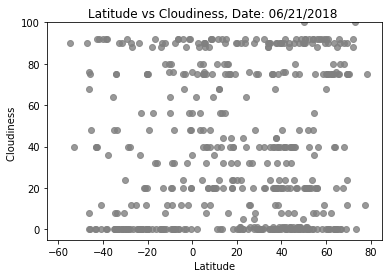

In [12]:
#Plot of latitude vs Cloudiness
sns.regplot(x_axis, y_axis_cloudiness, data=None, x_estimator=None, x_bins=None, x_ci='ci', 
            scatter=True, fit_reg=False, ci=95, n_boot=1000, units=None, order=1, 
            logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, 
            truncate=False, dropna=True, x_jitter=None, y_jitter=None, label=None, color="grey", 
            marker='o', scatter_kws=None, line_kws=None, ax=None)
plt.title("Latitude vs Cloudiness, Date: 06/21/2018 ")
plt.xlim(-65,85)
plt.ylim(-5,100)
plt.ylabel("Cloudiness ")
plt.savefig("Images/latvscloudiness.png")

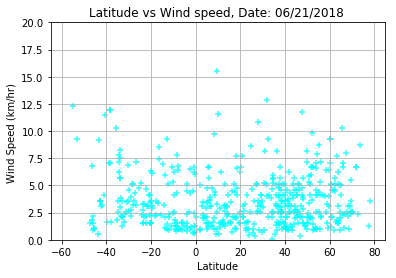

In [13]:
#Latitude vs windspeed
sns.regplot(x_axis, y_axis_Windspeed, data=None, x_estimator=None, x_bins=None, x_ci='ci', 
            scatter=True, fit_reg=False, ci=95, n_boot=1000, units=None, order=1, 
            logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, 
            truncate=False, dropna=True, x_jitter=None, y_jitter=None, label=None, color="cyan", 
            marker='+', scatter_kws=None, line_kws=None, ax=None)
plt.title("Latitude vs Wind speed, Date: 06/21/2018 ")
plt.grid()
plt.xlim(-65,85)
plt.ylim(-0,20)
plt.ylabel("Wind Speed (km/hr) ")
plt.savefig("Images/latvswindspeed.png")